In [1]:
import pandas as pd

data = pd.read_csv("/Users/aj/cojects/Methane/data/plumes_TX.csv", on_bad_lines='skip')

In [4]:

# Ensure 'datetime' is in the correct format
data['datetime'] = pd.to_datetime(data['datetime'])

# Extract the month
data['month'] = data['datetime'].dt.month

# Define a function to map the month to the season
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Apply the function to create a 'season' column
data['season'] = data['month'].apply(get_season)

# Check the new season column
print(data[['datetime', 'season']].head())


                   datetime  season
0 2023-12-24 17:45:45+00:00  Winter
1 2023-12-24 17:45:45+00:00  Winter
2 2023-12-24 17:45:45+00:00  Winter
3 2023-12-24 17:45:33+00:00  Winter
4 2023-12-24 17:45:33+00:00  Winter


In [5]:
# Select relevant columns
selected_columns = ['season', 'gas', 'emission_cmf_type', 'plume_latitude', 'plume_longitude', 'datetime']

# Remove rows with missing values in important columns
data = data[selected_columns].dropna()

# Check the resulting dataframe
print(data.head())


   season  gas emission_cmf_type  plume_latitude  plume_longitude  \
0  Winter  CH4               mfa       31.938671      -103.572446   
1  Winter  CH4               mfa       31.850389      -103.636325   
2  Winter  CH4               mfa       31.203041      -103.505160   
3  Winter  CH4               mfa       31.980928      -103.705163   
4  Winter  CH4               mfa       31.912072      -103.807296   

                   datetime  
0 2023-12-24 17:45:45+00:00  
1 2023-12-24 17:45:45+00:00  
2 2023-12-24 17:45:45+00:00  
3 2023-12-24 17:45:33+00:00  
4 2023-12-24 17:45:33+00:00  


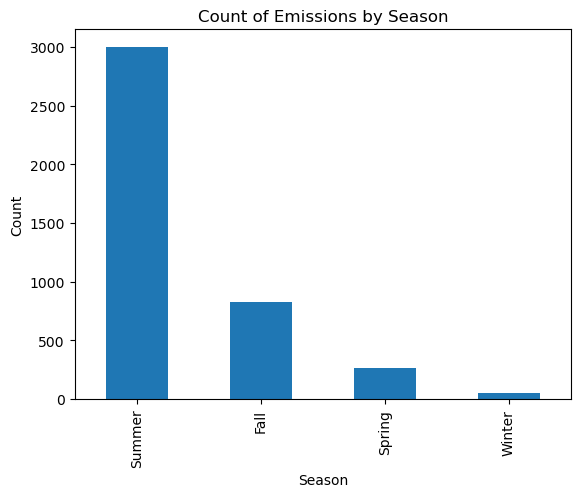

KeyError: 'Column not found: emission_auto'

In [9]:
import matplotlib.pyplot as plt

# Plot the count of emissions per season
data['season'].value_counts().plot(kind='bar', title='Count of Emissions by Season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

# If emission levels are numeric, plot the average emission by season
# Assuming 'emission_level' is a column containing the emission quantity (you may need to adjust based on your data)
data.groupby('season')['emission_auto'].mean().plot(kind='bar', title='Average Emission by Season')
plt.xlabel('Season')
plt.ylabel('Average Emission Level')
plt.show()
